<a href="https://colab.research.google.com/github/dinarrahman30/Belajar-Pengembangan-Machine-Learning/blob/main/Sentiment_Analysis_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Informasi Data Diri
Nama: Dinar Wahyu Rahman

Username Dicoding: dinar_wahyu


Email: dinarrahman30@gmail.com

LinkedIn: [Dinar Wahyu Rahman]('https:www.linkedin.com/in/dinar-wahyu-rahman/')

Alamat: Kota Jakarta Barat, DKI Jakarta

## Sentiment Analysis using Base Machine Learning Model

Review analisis sentimen aplikasi WhatsApp. Mengambil data content dan rating aplikasi WhatsApp dari Google play store. Link Scraping data: [Open Colab]('https://colab.research.google.com/drive/19GRTfcX0q5H70JruOlQGmdEEdR3kqvQb?usp=sharing')

#### import library dasar dan menampilkan dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyek Sentiment Analysis - Dicoding/whatsapp_reviews.csv')
df.head()

,reviewId,content,score
0,42ab0a52-461e-43f2-832d-bc9d673ce318,"Setelah update , kendala ""petama: no yg sudah ...",2
1,735b7a11-709f-4670-88b1-3d1ed10cff11,"Aku kasih bintang 2 ,semenjak wa update terus ...",2
2,32066e19-31f7-410b-a684-150e0209ba09,Buat aplikasi whatsApp saya minta tolong untuk...,4
3,d45c6629-2e38-4a8e-bdd1-21b7122ef989,Terima kasih Aplikasi ini sangat membantu untu...,4
4,7dd17304-1cf9-4a8f-8e91-e340070c27c6,"makin di update, makin parah sih kualitas apli...",1


In [ ]:
df.shape

(6000, 3)

In [ ]:
df.describe()

,score
count,6000.000000
mean,2.549333
std,1.533610
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


#### Cek data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
reviewId,0
content,0
score,0


In [ ]:
df.isnull().sum()

,0
reviewId,0
content,0
score,0


#### Quick EDA

In [ ]:
score_counts = df['score'].value_counts().sort_index()
score_counts.head()

,count
score,
1,2352
2,869
3,1001
4,687
5,1091


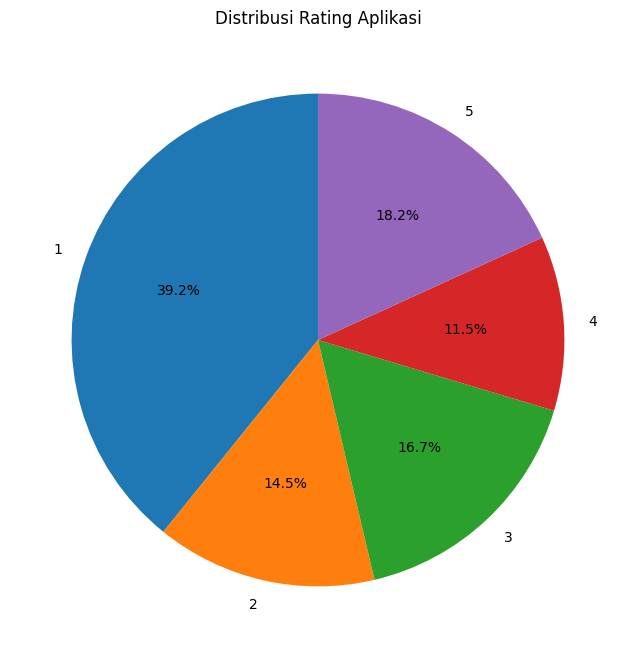

In [ ]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Distribusi Rating Aplikasi')

# Menampilkan pie chart
plt.show()

Rating terbanyak ialah bintang 1, sebanyak 39.5%

#### Teks Prepocessing


In [ ]:
df_copy = df.copy()

In [ ]:
!pip install nltk

In [ ]:
# package kamus besar bahasa indonesia
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
# library yang digunakan untuk teks prepocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Casefolding dan memberihkan data dari simbol yang tidak digunakan

def casefolding_and_cleaning(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r"http\S+", '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.replace('\n', ' ')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip(' ')
  return text

df_copy['clean_content'] = df_copy['content'].apply(casefolding_and_cleaning)
df_copy['clean_content'].head()

,clean_content
0,setelah update kendala petama no yg sudah ...
1,aku kasih bintang semenjak wa update terus m...
2,buat aplikasi whatsapp saya minta tolong untuk...
3,terima kasih aplikasi ini sangat membantu untu...
4,makin di update makin parah sih kualitas apli...


In [ ]:
# normalisasi
norm = {"dgn" : "dengan", "gue": "saya", "dgn": "dengan", "bgmn": "bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ',
        'thanks': 'terima kasih', 'fast': 'cepat', 'dg':'dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ',
        'recomend':' rekomen ', 'good':' bagus ', "wa": "whatsapp", "no": "nomor", "abis": "habis", "masi": "masih", "wts": "jual", "wtt": "tukar",
        "bgt": "banget", "maks": "maksimal", "hp": "handphone", "pdhl": "padahal", "jd": " menjadi", "gk": "tidak",}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_copy['normalisasi'] = df_copy['clean_content'].apply(lambda x: normalisasi(x))
df_copy['normalisasi'].head()

,normalisasi
0,setelah update kendala petama nomor yg sud...
1,aku kasih bintang semenjak whatsapp update t...
2,buat aplikasi whatsapp saya minta tolong untuk...
3,terima kasih aplikasi ini sangat membantu untu...
4,makin di update makin parah sih kualitas apli...


In [ ]:
# Removing Stopword
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk

# Unduh stopwords dari nltk
nltk.download('stopwords')

# Gabungkan stopwords bahasa Indonesia (Sastrawi) dan bahasa Inggris (nltk)
factory = StopWordRemoverFactory()
stopwords_indonesia = factory.get_stop_words()
stopwords_english = stopwords.words('english')
combined_stopwords = set(stopwords_indonesia + stopwords_english)

# Fungsi untuk membersihkan teks dan menghapus stopwords
def clean_text_remove_stopwords(text):
    # Check if text is a list and join it into a string if necessary
    if isinstance(text, list):
        text = ' '.join(text)

    # Lowercase teks
    text = text.lower()
    # Hapus angka dan tanda baca
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)      # Hapus angka
    # Tokenisasi kata
    words = text.split()
    # Hapus stopwords
    filtered_words = [word for word in words if word not in combined_stopwords]
    # Gabungkan kembali menjadi kalimat
    return ' '.join(filtered_words)

df_copy['after_stopword'] = df_copy['normalisasi'].apply(clean_text_remove_stopwords)

# Hasil
for original, cleaned in zip(df_copy['content'], df_copy['after_stopword']):
    print(f"Teks Asli: {original}")
    print(f"Teks Bersih: {cleaned}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Streaming output truncated to the last 5000 lines.
Teks Bersih: kok semakin diupdate semakin jelek masak tadi mau ngirim video teman ga ngirim video teman malah disuruh cari video ttp aja ga ngirim diperbaiki

Teks Asli: Aplikasinya semakin aneh. Baru aktifin akun tiba tiba diblokir permanen, padahal tidak melakukan spam dan lain sebagainya ... Makin kesini makin aneh ni aplikasi ... Lama lama ditinggal penggunanya kalo kayak gini terus .. Sekalinya mengajukan banding, malah tambah ga jelas.. dipersulit .
Teks Bersih: aplikasinya semakin aneh baru aktifin akun tiba tiba diblokir permanen padahal melakukan spam sebagainya makin kesini makin aneh ni aplikasi lama lama ditinggal penggunanya kalo kayak gini terus sekalinya mengajukan banding malah tambah ga jelas dipersulit

Teks Asli: Entah mengapa sekarang WhatsApp lebih banyak bug,saya sgt resah dgn hal ini bugnya sangat menggangu saya jika sedang melakukan aktivitas di WhatsApp, bug nya bnyk sekali seperti 1.tidak bisa share langsung f

In [ ]:
# Tokenizing

nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

df_copy['tokenized'] = df_copy['after_stopword'].apply(lambda x: nltk.word_tokenize(x))
df_copy['tokenized'].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokenized
0,"[update, kendala, petama, nomor, yg, disimpan,..."
1,"[aku, kasih, bintang, semenjak, whatsapp, upda..."
2,"[buat, aplikasi, whatsapp, minta, perbaiki, ba..."
3,"[terima, kasih, aplikasi, sangat, membantu, be..."
4,"[makin, update, makin, parah, sih, kualitas, a..."


#### Pelabelan Rating (angka) ke Sentimen

dengan teknik VADER (Valence Aware Dictionary and sEntiment Reasoner), Sangat efektif untuk teks informal dan sosial media, cocok untuk analisis sentimen dalam konteks tersebut.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
# dengan teknik VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk analisis sentimen
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Terapkan analisis ke dataset
df_copy['sentiment_score'] = df_copy['content'].apply(lambda x: analyze_sentiment(str(x)))

In [ ]:
# Klasifikasi sentimen
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_copy['sentiment'] = df_copy['sentiment_score'].apply(classify_sentiment)

In [ ]:
# Distribusi sentimen
print(df_copy['sentiment'].value_counts())

# Tampilkan hasil analisis
print(df_copy.head())

sentiment
Neutral     4240
Negative    1016
Positive     744
Name: count, dtype: int64
                               reviewId  \
0  42ab0a52-461e-43f2-832d-bc9d673ce318   
1  735b7a11-709f-4670-88b1-3d1ed10cff11   
2  32066e19-31f7-410b-a684-150e0209ba09   
3  d45c6629-2e38-4a8e-bdd1-21b7122ef989   
4  7dd17304-1cf9-4a8f-8e91-e340070c27c6   

                                             content  score  \
0  Setelah update , kendala "petama: no yg sudah ...      2   
1  Aku kasih bintang 2 ,semenjak wa update terus ...      2   
2  Buat aplikasi whatsApp saya minta tolong untuk...      4   
3  Terima kasih Aplikasi ini sangat membantu untu...      4   
4  makin di update, makin parah sih kualitas apli...      1   

                                       clean_content  \
0  setelah update   kendala  petama  no yg sudah ...   
1  aku kasih bintang   semenjak wa update terus m...   
2  buat aplikasi whatsapp saya minta tolong untuk...   
3  terima kasih aplikasi ini sangat membantu untu..

#### Ekstrasi fitur/Feature engineering

Pembobotan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Pisahkan data menjadi content dan label (sentimen)
x = df_copy['tokenized'].apply(lambda tokens: ' '.join(tokens))  # Join tokens into a single string
y = df_copy['sentiment']

cv = CountVectorizer()
term_fit = cv.fit(x)

print(len(term_fit.vocabulary_))

9656


In [ ]:
term_fit.vocabulary_

{'update': 9242,
 'kendala': 3880,
 'petama': 6884,
 'nomor': 6082,
 'yg': 9627,
 'disimpan': 2203,
 'malah': 4684,
 'ilang': 3203,
 'semua': 7819,
 'jadi': 3334,
 'antidaka': 259,
 'telp': 8529,
 'nama': 5746,
 'simpan': 8035,
 'sebelumnya': 7612,
 'kedua': 3736,
 'nomortifikasi': 6124,
 'whatsapp': 9442,
 'masuk': 4780,
 'whatsapplaupun': 9478,
 'dichat': 1844,
 'ditelp': 2246,
 'kalau': 3550,
 'buka': 1285,
 'app': 351,
 'nya': 6164,
 'mohon': 5633,
 'diperbaiki': 2079,
 'pesan': 6872,
 'tersebut': 8752,
 'penting': 6685,
 'terima': 8654,
 'kasih': 3614,
 'aku': 137,
 'bintang': 1095,
 'semenjak': 7804,
 'terus': 8801,
 'kebanyakan': 3671,
 'ngebug': 5880,
 'nomortif': 6118,
 'kadang': 3528,
 'gak': 2693,
 'terbaca': 8586,
 'udah': 9143,
 'ngetik': 5984,
 'banyak': 616,
 'tiba': 8854,
 'log': 4545,
 'sendiri': 7837,
 'panggilan': 6382,
 'sama': 7446,
 'sekali': 7708,
 'padahal': 6337,
 'pengaturan': 6610,
 'ditambah': 2227,
 'penyimpanan': 6710,
 'apk': 313,
 'semakin': 7781,
 'besa

In [ ]:
dokumen = term_fit.transform(x)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

[9.00653422 9.00653422 9.00653422 ... 7.90792193 9.00653422 9.00653422]


#### Model training menggunakan Random Forest

In [ ]:
# membagi dataset ke data training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 7954)
(1800, 7954)
(4200,)
(1800,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
model = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi pada data uji
y_pred = model.predict(x_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8672222222222222
Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.70      0.78       312
     Neutral       0.86      0.98      0.92      1267
    Positive       0.91      0.47      0.62       221

    accuracy                           0.87      1800
   macro avg       0.88      0.72      0.77      1800
weighted avg       0.87      0.87      0.86      1800



Akurasi yang tercapai 87%